<a href="https://colab.research.google.com/github/biagmes/MVP---Bianca-Gomes/blob/main/MVP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Carregamento dos dados**





In [42]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [43]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [44]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/biagmes/MVP---Bianca-Gomes/2107b336596ead82faf4467785df212b6ecd5549/E-commerce%20%20cosmetic%20dataset%20-%20MVP.csv"

# Cabeçalho das colunas
colunas = ['Produto', 'Website', 'País', 'Categoria', 'Subcategoria','Preço', 'Marca', 'Fórmula', 'Tipo', 'Cor', 'Tamanho']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, header=None, delimiter=';', encoding='latin1')

## **Análise Exploratória de Dados**

Este trabalho tem como objetivo analisar o volume de compras de cosméticos da loja Ulta, um dos maiores E-commerces de produtos de beleza nos Estados Unidos. A análise é baseada em um dataset que contém informações detalhadas sobre as compras realizadas, organizadas por categorias de produtos. Embora o estudo não busque resolver um problema específico, ele foca em identificar tendências e padrões no comportamento de compra dos consumidores no segmento de cosméticos. Para isso, técnicas de aprendizado não supervisionado são aplicadas, permitindo a descoberta de agrupamentos e padrões ocultos nos dados.
Em resumo, a análise das categorias dos cosméticos vendidos pode oferecer insights detalhados sobre o desempenho de produtos, estratégias de marca e comportamento do consumidor. Esses dados podem ser utilizados para otimizar o portfólio de produtos, ajustar estratégias de marketing e personalizar recomendações para os consumidores.

In [45]:
dataset.head()

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor,Tamanho
0,Deadsea Mud Purifying Mud Soap,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color,102.0
1,Natural Dead Sea Bath Salts,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color,255.0
2,Superfood Shower Gel Kale & Turmeric,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,0.0
3,Sea-Kissed Mineral Shower Gel,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,204.0
4,Mineral Botanic Velvet Cream Wash,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,510.0


In [46]:
# Informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3707 entries, 0 to 3706
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Produto       3707 non-null   object 
 1   Website       3707 non-null   object 
 2   País          3707 non-null   object 
 3   Categoria     3707 non-null   object 
 4   Subcategoria  3707 non-null   object 
 5   Preço         3706 non-null   float64
 6   Marca         3707 non-null   object 
 7   Fórmula       3701 non-null   object 
 8   Tipo          3701 non-null   object 
 9   Cor           3551 non-null   object 
 10  Tamanho       3431 non-null   float64
dtypes: float64(2), object(9)
memory usage: 318.7+ KB
None


In [47]:
# 5 primeiras linhas do dataset
dataset.head(5)

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor,Tamanho
0,Deadsea Mud Purifying Mud Soap,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color,102.0
1,Natural Dead Sea Bath Salts,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color,255.0
2,Superfood Shower Gel Kale & Turmeric,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,0.0
3,Sea-Kissed Mineral Shower Gel,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,204.0
4,Mineral Botanic Velvet Cream Wash,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color,510.0


In [48]:
# 5 últimas linhas do dataset
dataset.tail(5)

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor,Tamanho
3702,Flawless Brightening Concealer,ulta,USA,face,concealer,49.02,e.l.f. Cosmetics,stick,combination.dry.oily.normal,NaN,21.0
3703,BB Crayon Concealer & Touch-Up Stick,ulta,USA,face,concealer,212.42,Erborian,stick,combination.dry.oily.normal,NaN,3.0
3704,Universal Stick Concealer,ulta,USA,face,concealer,979.58,KIKO Milano,stick,normal,NaN,15.0
3705,Nudies Tinted Blur Foundation Stick,ulta,USA,face,concealer,261.44,NUDESTIX,stick,combination.dry.oily.normal,Medium 33 W,66.0
3706,4-In-1 Foundation Stick,ulta,USA,face,foundation,277.78,Pur Beauty,stick,combination.dry.oily.normal,Coral Rose,9.0


In [49]:
# Distribuição das classes de Categoria
print(dataset.groupby('Categoria').size())

Categoria
body        1269
eyes         410
face         142
hair         433
lips         346
skincare    1107
dtype: int64


In [50]:
# Distribuição das classes de Subcategoria
print(dataset.groupby('Subcategoria').size())

Subcategoria
blush             19
bodywash         450
cleanser         143
concealer         25
dry shampoo       88
eye primer        14
eye treatment     62
eyebrow           97
eyelashes          2
eyeliner         131
eyeshadow        110
face wash        172
foundation        46
lipbalm           66
lipgloss          74
lipliner          50
lipstain           5
lipstick         151
mascara           48
mask              68
moisturizer      272
perfume          802
powder            36
primer             6
serum            444
shampoo          214
spray             30
sunscreen         15
toner             67
dtype: int64


In [51]:
# Dados das categorias
data_categoria = {
    'Categoria': ['body', 'eyes', 'face', 'hair', 'lips', 'skincare'],
    'Contagem': [1269, 410, 142, 433, 346, 1107]
}

# Dados das subcategorias
data_subcategoria = {
    'Subcategoria': ['blush', 'bodywash', 'cleanser', 'concealer', 'dry shampoo',
                    'eye primer', 'eye treatment', 'eyebrow', 'eyelashes', 'eyeliner',
                    'eyeshadow', 'face wash', 'foundation', 'lipbalm', 'lipgloss',
                    'lipliner', 'lipstain', 'lipstick', 'mascara', 'mask',
                    'moisturizer', 'perfume', 'powder', 'primer', 'serum',
                    'shampoo', 'spray', 'sunscreen', 'toner'],
    'Contagem': [19, 450, 143, 25, 88, 14, 62, 97, 2, 131,
                 110, 172, 46, 66, 74, 50, 5, 151, 48, 68,
                 272, 802, 36, 6, 444, 214, 30, 15, 67]
}

# Mapeamento das subcategorias para categorias
category_mapping = {
    'bodywash': 'body', 'sunscreen': 'body', 'moisturizer': 'body', 'perfume': 'body',
    'mascara': 'eyes', 'eyeliner': 'eyes', 'eyeshadow': 'eyes', 'eye primer': 'eyes',
    'eyebrow': 'eyes', 'serum': 'eyes', 'eyelashes': 'eyes',
    'dry shampoo': 'hair', 'shampoo': 'hair',
    'lipstick': 'lips', 'lipbalm': 'lips', 'lipgloss': 'lips', 'lipstain': 'lips',
    'lipliner': 'lips',
    'eye treatment': 'skincare', 'mask': 'skincare', 'cleanser': 'skincare',
    'face wash': 'skincare', 'toner': 'skincare', 'spray': 'skincare',
    'concealer': 'face', 'foundation': 'face', 'primer': 'face',
    'blush': 'face', 'powder': 'face'
}

# Criar DataFrames
df_categoria = pd.DataFrame(data_categoria)
df_subcategoria = pd.DataFrame(data_subcategoria)

# Adicionar coluna de categoria ao DataFrame de subcategorias
df_subcategoria['Categoria'] = df_subcategoria['Subcategoria'].map(category_mapping)

# Mostrar os DataFrames resultantes
print(df_categoria)
print(df_subcategoria)

  Categoria  Contagem
0      body      1269
1      eyes       410
2      face       142
3      hair       433
4      lips       346
5  skincare      1107
     Subcategoria  Contagem Categoria
0           blush        19      face
1        bodywash       450      body
2        cleanser       143  skincare
3       concealer        25      face
4     dry shampoo        88      hair
5      eye primer        14      eyes
6   eye treatment        62  skincare
7         eyebrow        97      eyes
8       eyelashes         2      eyes
9        eyeliner       131      eyes
10      eyeshadow       110      eyes
11      face wash       172  skincare
12     foundation        46      face
13        lipbalm        66      lips
14       lipgloss        74      lips
15       lipliner        50      lips
16       lipstain         5      lips
17       lipstick       151      lips
18        mascara        48      eyes
19           mask        68  skincare
20    moisturizer       272      body
21        

O gráfico a seguir mostra a quantidade de produtos vendidos por categoria, observa-se que produtos de corpo "Body" possuem maior concentração de vendas.

Para melhorar a visualização, o gráfico acima foi dividido em subcategorias de produtos.

Dos produtos mais vendidos, o perfume é o líder de vendas, seguido do *bodywash* e Serum para olhos.

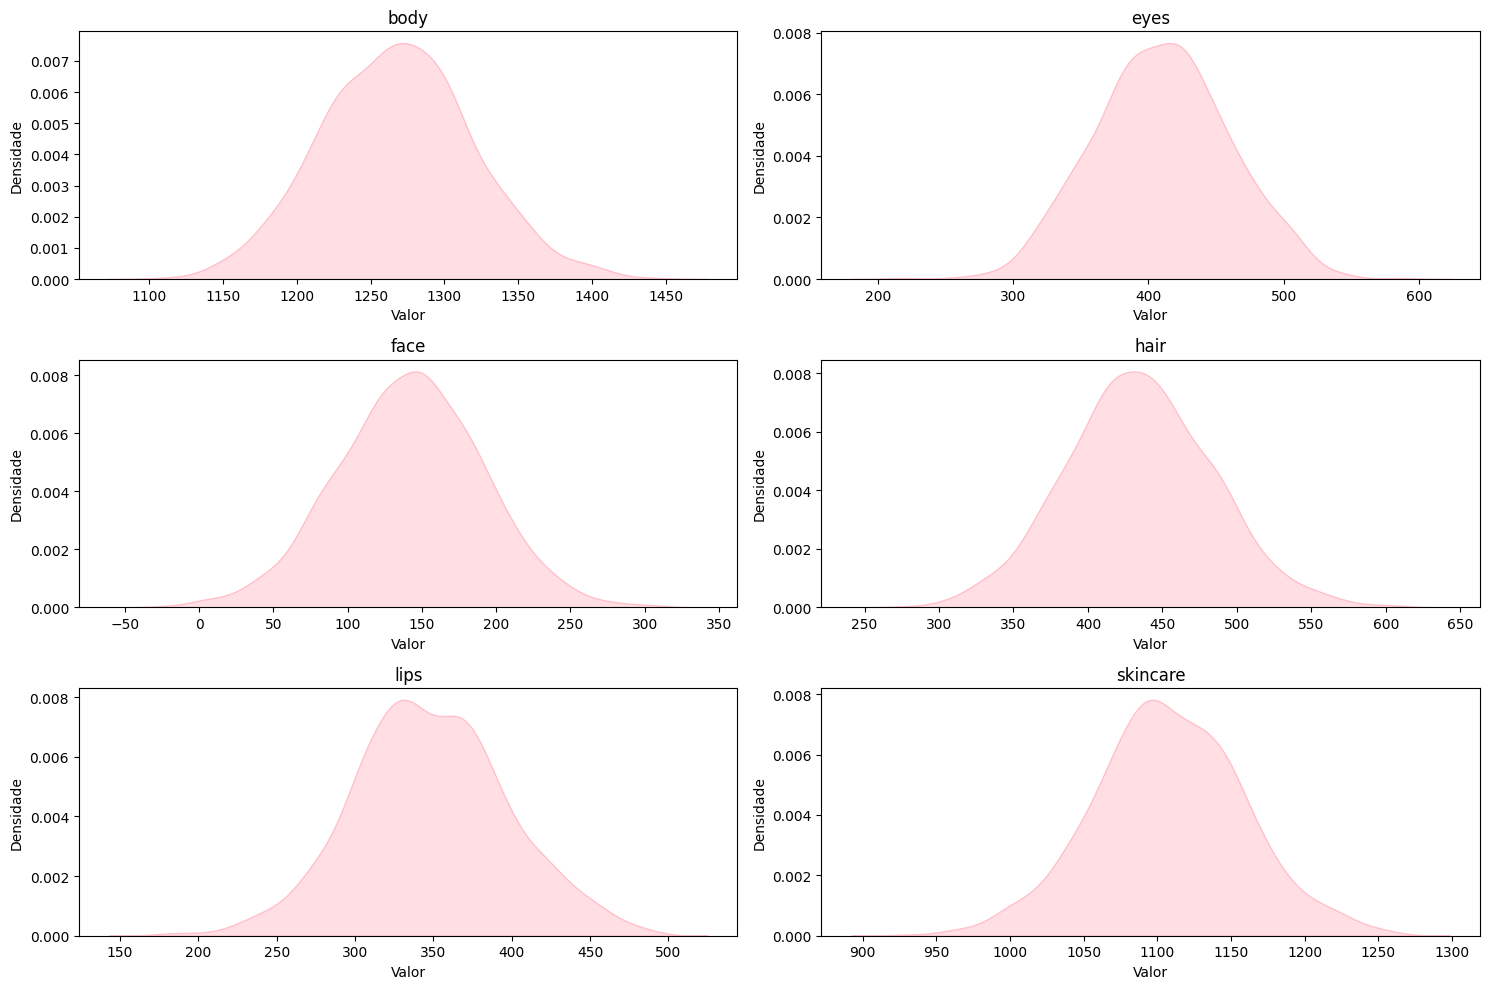

In [52]:
# Density Plot
plt.figure(figsize=(15, 10))

for i, row in df_categoria.iterrows():
    data = np.random.normal(loc=row['Contagem'], scale=50, size=1000)
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data, fill=True, color='pink', alpha=0.5)
    plt.title(row['Categoria'])
    plt.xlabel('Valor')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

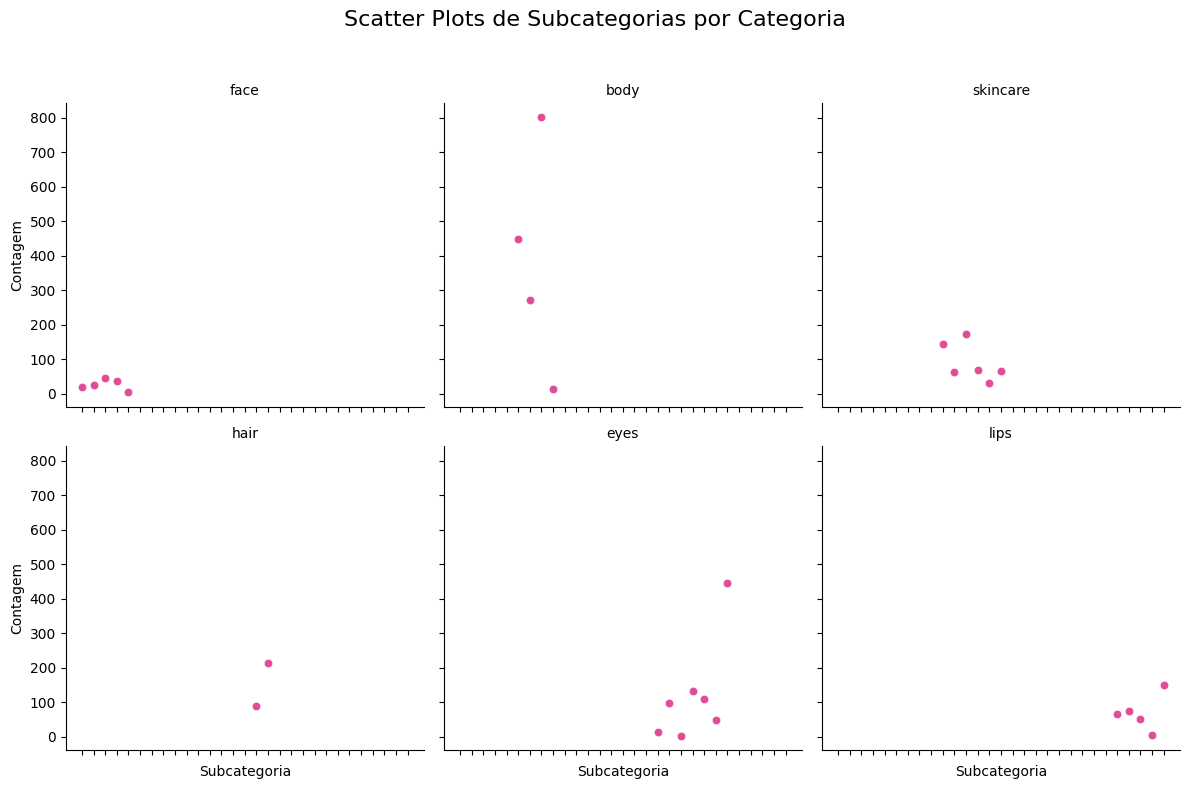

In [53]:
# Scatter plot

g = sns.FacetGrid(df_subcategoria, col='Categoria', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Subcategoria', 'Contagem', color='#D5006D', alpha=0.7)

# Configurações do gráfico
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Subcategoria", "Contagem")
g.fig.suptitle('Scatter Plots de Subcategorias por Categoria', fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


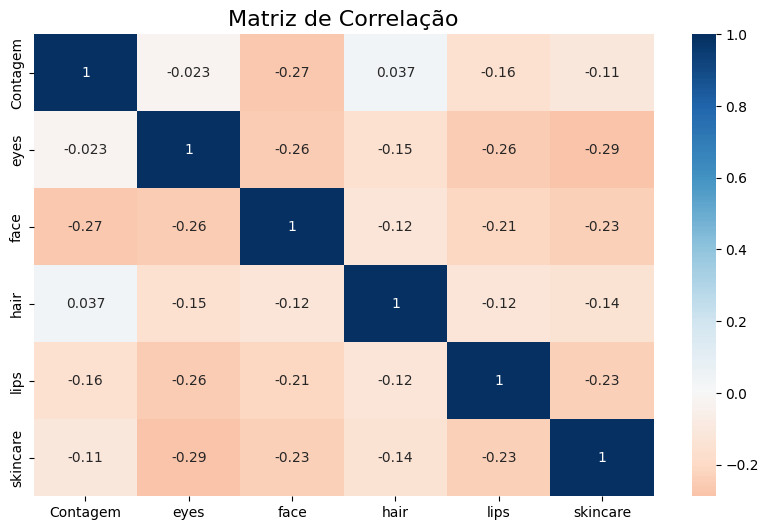

In [54]:
# Matriz de Correlação
df_dummies = pd.get_dummies(df_subcategoria['Categoria'], drop_first=True)
correlation_matrix = pd.concat([df_subcategoria['Contagem'], df_dummies], axis=1).corr()

# Plotar
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Os resultados evidenciam que os consumidores demonstram uma preferência pela compra de produtos de cuidado pessoal, como perfumes, *body Wash, face Wash, shampoo*, em comparação a maquiagem. nessa análise podemos ver qual a real preferência. A partir dessa análise, podemos compreender com mais clareza as reais preferências dos consumidores no que diz respeito às categorias de cosméticos, oferecendo insights valiosos para estratégias de mercado e desenvolvimento de novos produtos.

## ***Machine Learning***

In [55]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Produto,0
Website,0
País,0
Categoria,0
Subcategoria,0
Preço,1
Marca,0
Fórmula,6
Tipo,6
Cor,156


<Axes: >

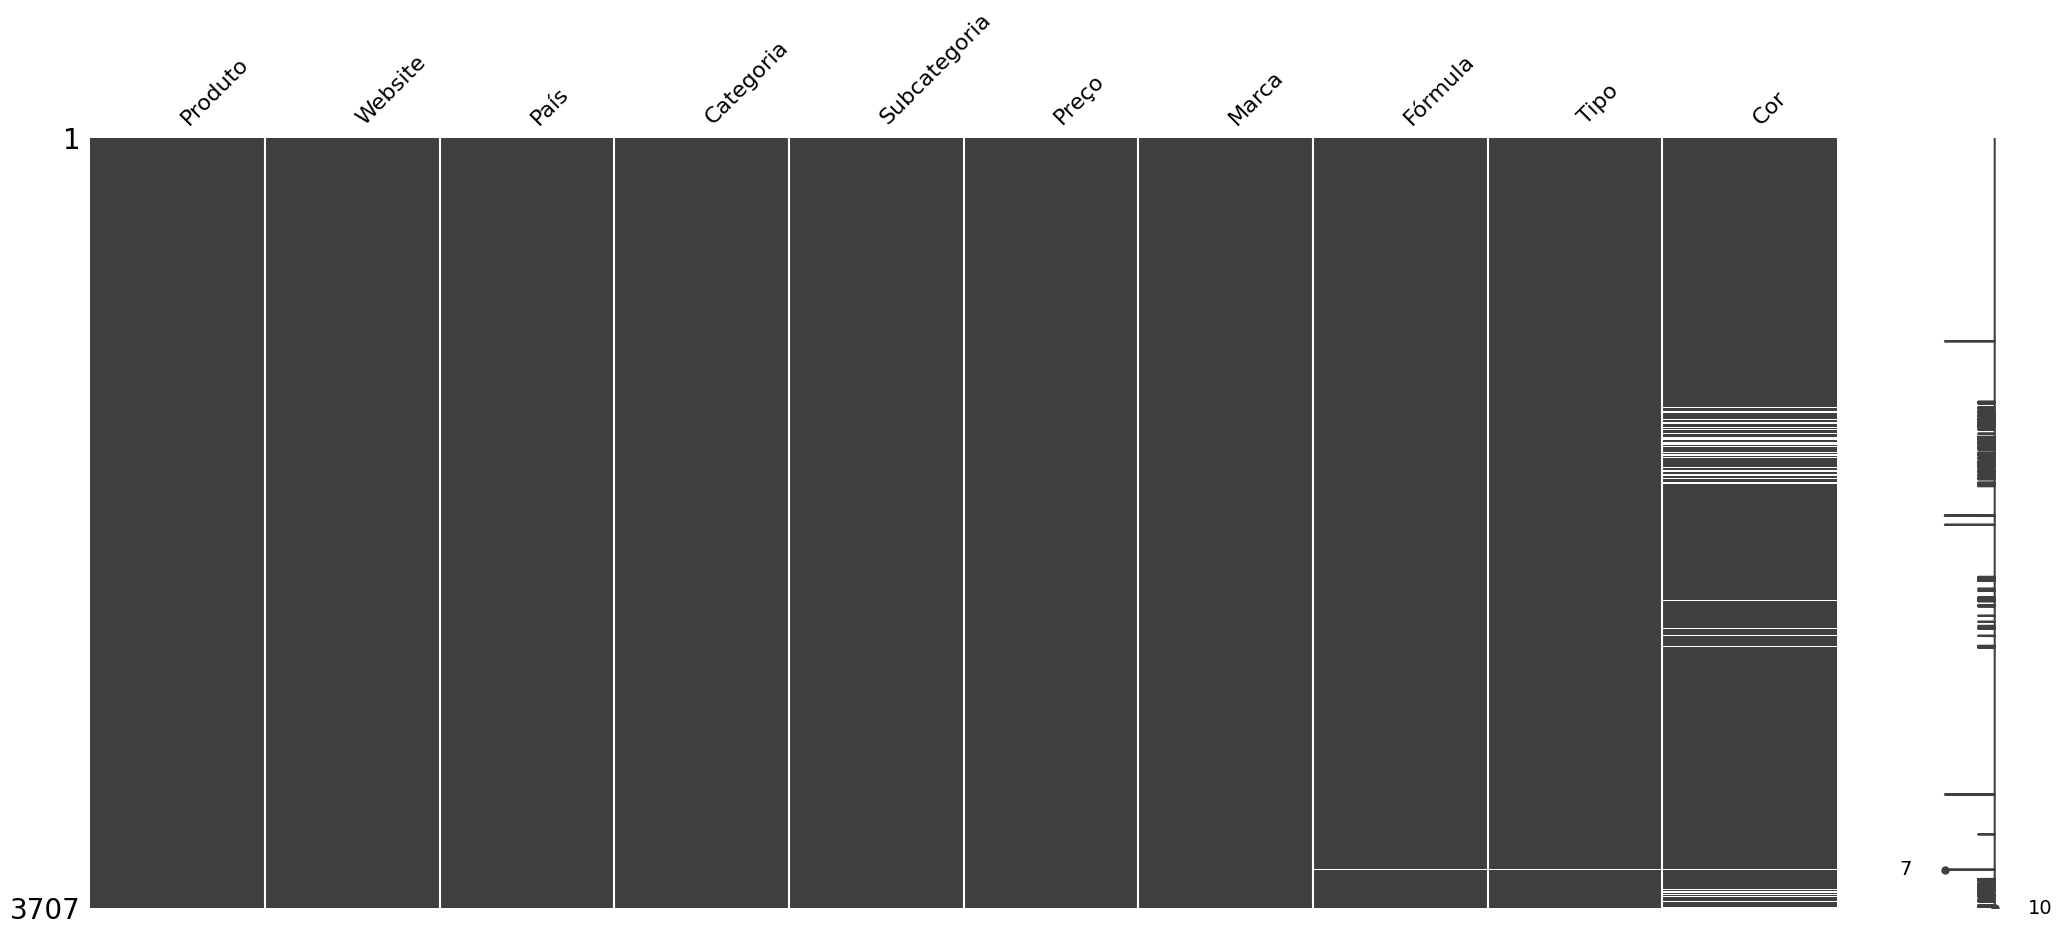

In [56]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

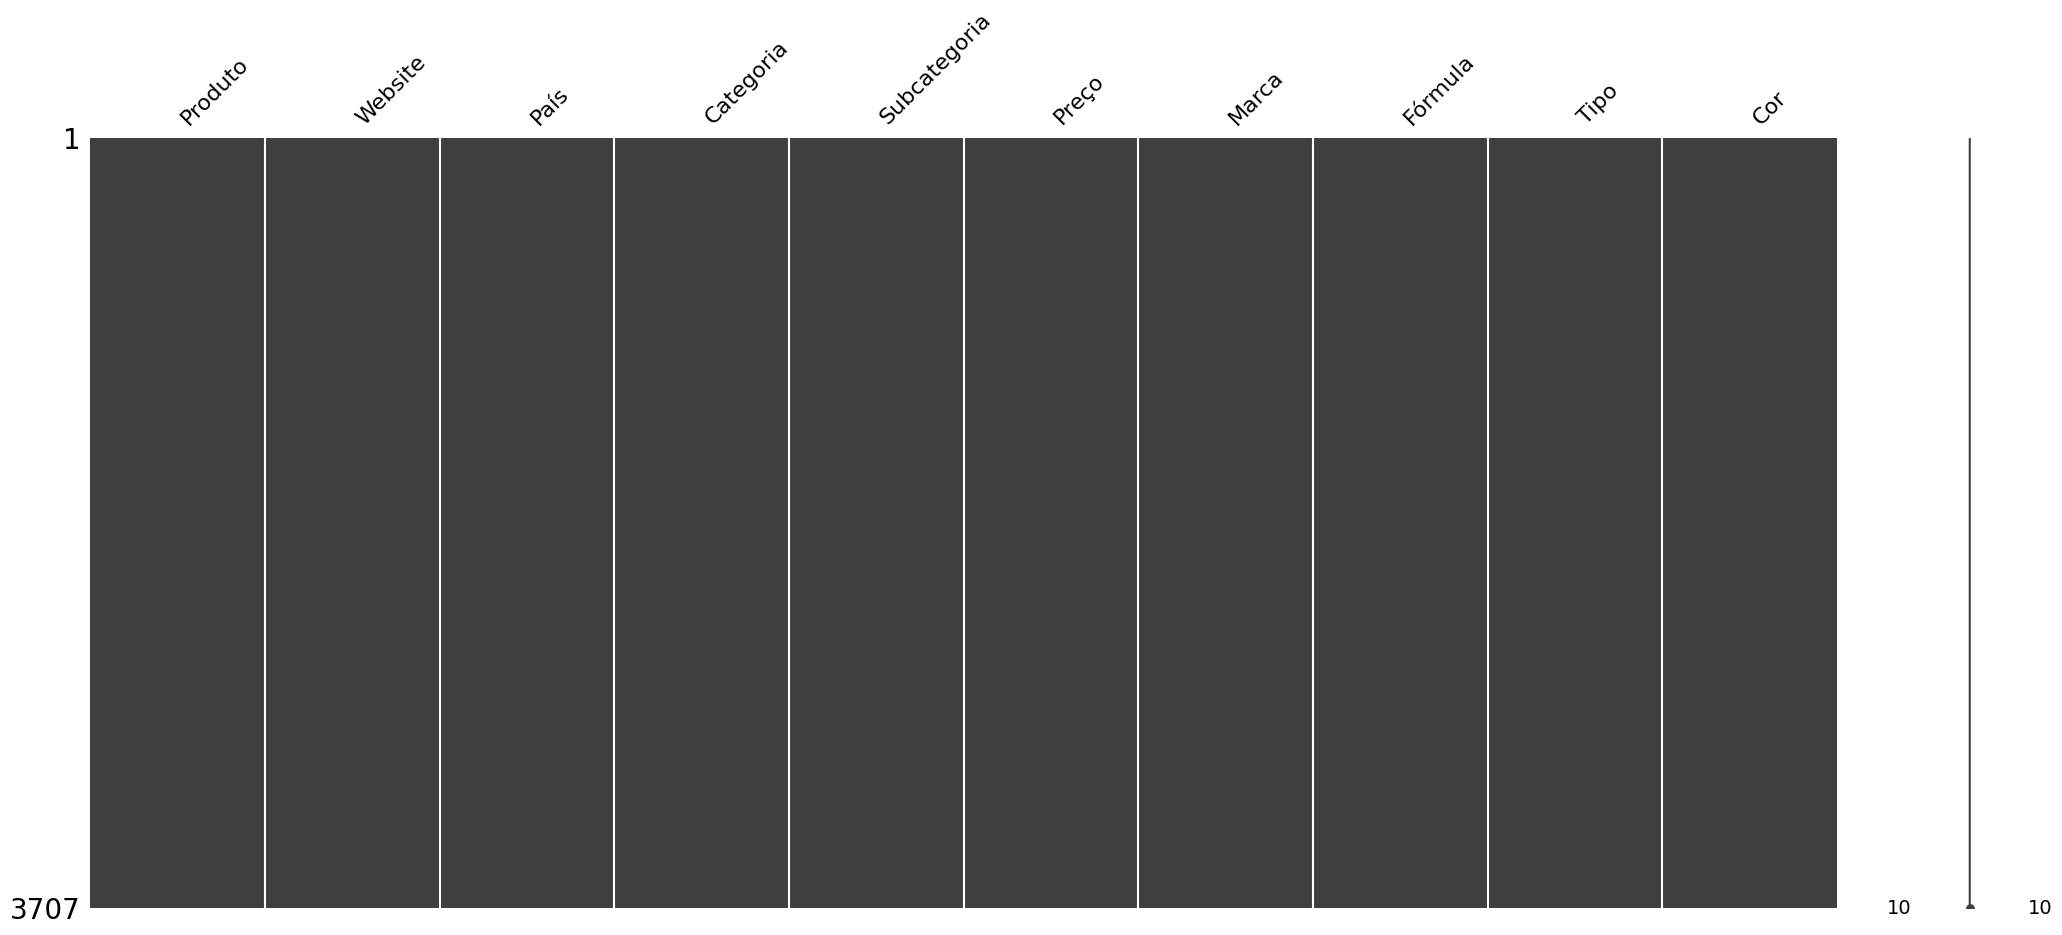

In [57]:
# substituindo os NaN de 'Fórmula', 'Tipo'e 'Cor' pela mediana da coluna
atributos['Fórmula'].fillna(atributos['Fórmula'].mode()[0], inplace=True)
atributos['Tipo'].fillna(atributos['Tipo'].mode()[0], inplace=True)
atributos['Cor'].fillna(atributos['Cor'].mode()[0], inplace=True)
atributos['Preço'].fillna(atributos['Cor'].mode()[0], inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [58]:
# Novo DataSet

datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()

,Produto,Website,País,Categoria,Subcategoria,Preço,Marca,Fórmula,Tipo,Cor
0,Deadsea Mud Purifying Mud Soap,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color
1,Natural Dead Sea Bath Salts,ulta,USA,body,bodywash,98.04,Ahava,cream,all,No color
2,Superfood Shower Gel Kale & Turmeric,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color
3,Sea-Kissed Mineral Shower Gel,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color
4,Mineral Botanic Velvet Cream Wash,ulta,USA,body,bodywash,196.08,Ahava,cream,all,No color


In [59]:
# Definição do X e y
X = datasetSemMissings[['Preço', 'Marca', 'Fórmula', 'Tipo']]
y = datasetSemMissings['Categoria']

# Transformar colunas categóricas para numéricas
X_encoded = X.copy()
for coluna in ['Marca', 'Fórmula', 'Tipo']:
    le = LabelEncoder()
    X_encoded[coluna] = le.fit_transform(X_encoded[coluna])

# Separação dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=7, stratify=y)

# Exibir o tamanho dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

# Criando os folds para validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)


Tamanho do conjunto de treino: (2965, 4)
Tamanho do conjunto de teste: (742, 4)


LR: 0.697469 (0.005090)
KNN: 0.603713 (0.010060)
CART: 0.942665 (0.007028)
NB: 0.402699 (0.005111)
SVM: 0.289033 (0.031527)
Bag: 0.955481 (0.006237)
RF: 0.951095 (0.002920)
ET: 0.951094 (0.003838)
Ada: 0.806425 (0.046814)
GB: 0.957165 (0.004569)
Voting: 0.801016 (0.020486)


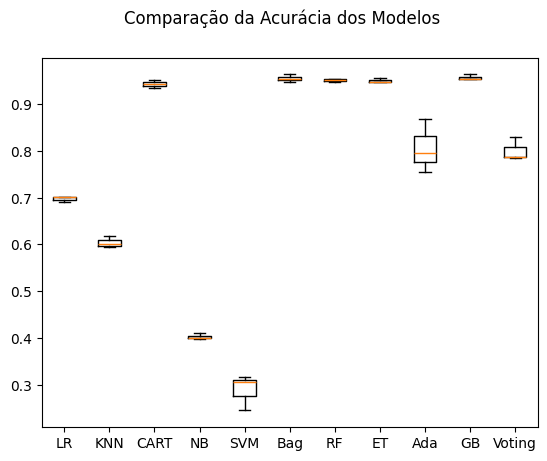

In [60]:
# Modelagem

# Definindo uma seed global
np.random.seed(7)

# Verificando e tratando NaNs
X_train.fillna(X_train.median(numeric_only=True), inplace=True)
y_train.fillna(y_train.mode()[0], inplace=True)

# Codificando variáveis categóricas
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))  # Converte tudo para string antes de codificar

# Verificando se y_train tem classes únicas ou NaN
if y_train.nunique() <= 1:
    print("Erro: O conjunto de dados tem apenas uma classe. Adicione mais exemplos ou balanceie o dataset.")
    exit()

# Definindo o número de árvores e o modelo base
num_trees = 100
base = DecisionTreeClassifier()

# Definindo os modelos
models = [
    ('LR', LogisticRegression(max_iter=100)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('CART', DecisionTreeClassifier(max_depth=10)),
    ('NB', GaussianNB()),
    ('SVM', SVC(kernel='linear', probability=True, max_iter=100)),
    ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees, n_jobs=-1)),
    ('RF', RandomForestClassifier(n_estimators=num_trees, max_features='sqrt', n_jobs=-1)),
    ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features='sqrt', n_jobs=-1)),
    ('Ada', AdaBoostClassifier(n_estimators=num_trees)),
    ('GB', GradientBoostingClassifier(n_estimators=num_trees)),
    ('Voting', VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=100)),
        ('rf', RandomForestClassifier(n_estimators=num_trees, max_features='sqrt', n_jobs=-1))
    ], n_jobs=-1))
]

# Avaliação dos modelos
results = []
names = []

# Reduzindo o número de divisões no KFold para 3
for name, model in models:
    try:
        cv_results = cross_val_score(model, X_train, y_train, cv=KFold(n_splits=3), scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    except Exception as e:
        print(f"Erro ao treinar o modelo {name}: \n{str(e)}")
        results.append([None])
        names.append(name)

# Exibindo o boxplot dos resultados

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.40161725067385445


In [62]:
# Otimização de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 100}


In [63]:
# Avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia no teste:", acuracia)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", matriz_confusao)

# Relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia no teste: 0.9029649595687331
Matriz de Confusão:
 [[226  23   0   0   0   5]
 [ 21  61   0   0   0   0]
 [  0   0  25   0   1   2]
 [  0   0   0  86   1   0]
 [  0   0   2   0  66   1]
 [  3   0   4   0   9 206]]
              precision    recall  f1-score   support

        body       0.90      0.89      0.90       254
        eyes       0.73      0.74      0.73        82
        face       0.81      0.89      0.85        28
        hair       1.00      0.99      0.99        87
        lips       0.86      0.96      0.90        69
    skincare       0.96      0.93      0.94       222

    accuracy                           0.90       742
   macro avg       0.88      0.90      0.89       742
weighted avg       0.91      0.90      0.90       742



In [64]:
# Definir modelos
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Avaliar cada modelo
resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    resultados[nome] = acuracia
    print(f"{nome}: Acurácia = {acuracia:.4f}")

# Comparar os resultados
print("Comparação de Modelos:", resultados)



Random Forest: Acurácia = 0.9232
Logistic Regression: Acurácia = 0.7722
Decision Tree: Acurácia = 0.9030
Comparação de Modelos: {'Random Forest': 0.9231805929919138, 'Logistic Regression': 0.7722371967654986, 'Decision Tree': 0.9029649595687331}
